<a href="https://colab.research.google.com/github/gideononyewuenyi/Time-Series-Analysis/blob/main/Time_Series_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIME SERIES FORECASTING

## Problem statement

Air pollution has been a major problem faced in Nigeria especially in the southern part of the country that’s plagued with soot resulting from illegal refining of crude oil, flaring of gases, and uncontrolled emission from automobiles. (https://qz.com/africa/912374/nigerian-city-of-port-harcourt-is-dealing-with-with-a-mystery-soot-air-pollution-panic/)
(https://twitter.com/FMEnvng/status/831561428414763009)


## What is my goal?

Our goal is to be able to predict the amount of air pollution (PM 2.5) over a period of time 
* (To determine air quality in an area, pollutant concentrations are physically measured and reported. The AQI is calculated based on the average concentration of a particular pollutant measured over a standard time interval (24 hours for most pollutants, 8 hours for carbon monoxide and ozone), you can learn more here:
https://fit.thequint.com/health-news/explaining-air-quality-index#read-more  
https://cpcb.nic.in/displaypdf.php?id=bmF0aW9uYWwtYWlyLXF1YWxpdHktaW5kZXgvQWJvdXRfQVFJLnBkZg== )


#### **Time Series** is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

#### It can help us to understand past behaviour and predict the future

## Import some relevant packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from IPython.display import display, HTML, display_html
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read in my data

In this notebook, we will be using a dataset of air quality obtained from the Purpleair sensor in Port Harcourt, Nigeria

In [ ]:
#url = "https://raw.githubusercontent.com/gideononyewuenyi/Exploratory-analysis/main/Lekki%20Phase%201%20(outside)%20(6.451397%203.471201)%20Primary%2030_minute_average%2012_17_2019%206_6_2021.csv"
#df = pd.read_csv (url)
url = "https://raw.githubusercontent.com/gideononyewuenyi/Time-Series-Forecasting/main/Port%20Harcourt%2C%20Nigeria%20(outside)%20(4.80678%207.002953)%20Primary%20Real%20Time%2007_27_2021%2008_03_2021.csv"
df = pd.read_csv (url)

## Take a look at my data
- How many rows and columns are in the dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? 


In [ ]:
# look at data
display(df.head())

# look a shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,2021-07-27 00:00:05 UTC,413,105.25,189.56,230.30,436.0,-53.0,82.0,63.0,125.72,NaN
1,2021-07-27 00:02:06 UTC,414,113.47,202.76,239.84,438.0,-53.0,82.0,63.0,134.43,NaN
2,2021-07-27 00:04:05 UTC,415,119.02,217.44,259.56,440.0,-53.0,82.0,63.0,144.21,NaN
3,2021-07-27 00:06:05 UTC,416,126.20,226.43,273.25,442.0,-53.0,82.0,63.0,150.29,NaN
4,2021-07-27 00:08:06 UTC,417,131.48,243.86,291.41,444.0,-53.0,82.0,63.0,161.82,NaN


(5461, 11)

created_at           object
entry_id              int64
PM1.0_CF1_ug/m3     float64
PM2.5_CF1_ug/m3     float64
PM10.0_CF1_ug/m3    float64
dtype: object

created_at          False
entry_id            False
PM1.0_CF1_ug/m3     False
PM2.5_CF1_ug/m3     False
PM10.0_CF1_ug/m3    False
dtype: bool

,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
count,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,5461.000000,0.0
mean,3143.000000,51.636479,86.137370,98.152769,2203.266068,-54.600073,86.659037,58.997803,62.215981,NaN
std,1576.599241,37.636242,70.356467,84.158415,2081.296338,3.755888,4.230171,8.929126,43.867013,NaN
min,413.000000,16.980000,27.860000,29.730000,1.000000,-69.000000,78.000000,29.000000,27.820000,NaN
25%,1778.000000,27.300000,43.050000,47.620000,442.000000,-57.000000,84.000000,55.000000,37.480000,NaN
50%,3143.000000,35.940000,56.160000,61.980000,1199.000000,-54.000000,85.000000,62.000000,43.890000,NaN
75%,4508.000000,59.180000,96.820000,109.600000,3944.000000,-52.000000,89.000000,66.000000,63.860000,NaN
85%,5054.000000,87.050000,146.020000,168.020000,5037.000000,-51.000000,91.000000,67.000000,96.630000,NaN
95%,5600.000000,137.500000,244.590000,286.980000,6135.000000,-49.000000,95.000000,68.000000,162.360000,NaN
99%,5818.400000,184.694000,349.200000,420.442000,6571.800000,-48.000000,100.000000,70.000000,232.020000,NaN


## Processing my data

In [ ]:
# Rename columns
df = df.rename(columns = {'created_at': 'dt', 'PM2.5_ATM_ug/m3': 'pm'})


# Change index to datetime
df['dt'].index = pd.to_datetime(df.index)

# Sort the values
df = df.sort_index(ascending = True)

# Fill values with forward fill
df = df.fillna(method='ffill')

# Show the end of the data
display(df.tail())

,dt,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,pm,Unnamed: 10
5456,2021-08-03 23:50:18 UTC,5869,125.58,222.44,259.49,704.0,-48.0,84.0,69.0,147.46,NaN
5457,2021-08-03 23:52:17 UTC,5870,120.38,213.91,249.43,706.0,-49.0,84.0,69.0,141.89,NaN
5458,2021-08-03 23:54:17 UTC,5871,118.11,215.66,251.62,708.0,-48.0,84.0,69.0,142.98,NaN
5459,2021-08-03 23:56:18 UTC,5872,113.34,201.43,238.93,710.0,-49.0,84.0,69.0,133.55,NaN
5460,2021-08-03 23:58:17 UTC,5873,106.44,190.41,222.87,712.0,-48.0,84.0,69.0,126.20,NaN


## Plot my data
* Is there an overall increasing trend? (movement of a series to relatively higher or lower values over a long period of time)
- Are there some differences in the variance over time? (increased amplitudes during the course of the time period observed)
- There may be some seasonality (i.e., cycles) in the data. (cycles that repeat regularly over time)

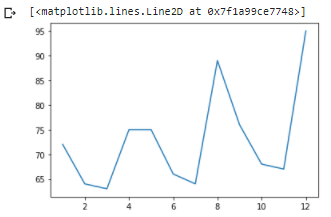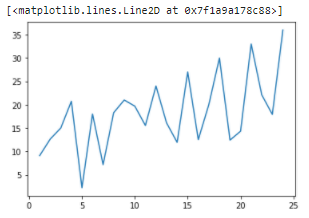

Text(0, 0.5, 'PM2.5')

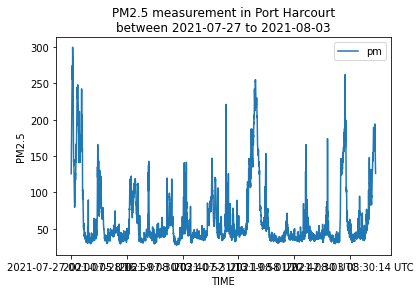

In [ ]:
df.plot(x="dt", y= 'pm')
plt.title("PM2.5 measurement in Port Harcourt\nbetween 2021-07-27 to 2021-08-03", size=12)
plt.xlabel('TIME', size=10)
plt.ylabel('PM2.5', size=10)

## Look at stationarity
Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,
*  It should have constant mean.
*  It should have constant variance or standard deviation.
*  Auto-covariance (used to estimate. the dominant periods in the time series) should not depend on time.

If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

##### Dickey-Fuller test is statistical tests for checking stationarity, while Rolling Statistics is more of a visual technique. In rolling statistics we plot the mean and standard deviation of the time series and see if it varies with time. Dickey-Fuller test comprise of a Test Statistic and some Critical Values for different confidence levels(1%, 5%, 10%). We visualize the results and if the ‘Test Statistic’ is less than the ‘Critical Value’, we can infer that the series is stationary.
**ADF statistic > critical value:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. **ADF statistic < critical value:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

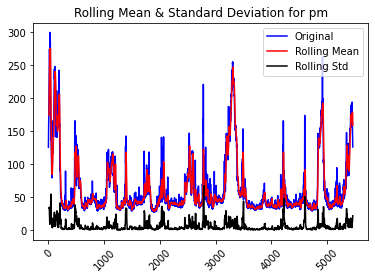

In [ ]:
# Determining rolling statistics
rolmean = df['pm'].rolling(window = 12, center = False).mean()
rolstd = df['pm'].rolling(window = 12, center = False).std()

# Plot rolling statistics:
orig = plt.plot(df['pm'],
                    color = 'blue', 
                    label = 'Original')
mean = plt.plot(rolmean,
                    color = 'red', 
                    label = 'Rolling Mean')
std = plt.plot(rolstd,
                   color = 'black', 
                   label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for %s' %('pm'))
plt.xticks(rotation = 45)
plt.show(block = False)
plt.close()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
X = df["pm"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Results of Dickey-Fuller Test:
ADF Statistic: -5.899379
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


Here different percentages represents various confidence levels. We generally consider results of 1% confidence interval as it will tell us whether the TS is stationary with 99% confidence.

## Correcting for stationarity

It is common for time series data to have to correct for non-stationarity. 



**What happens if you do not correct for these things?**

- Variance can be mis-specified
- Model fit can be worse.  
- Not leveraging valuable time-dependent nature of the data.  
 


## Ways to correct for trend and seasonality, to make the time series stationary.
The three common methods to achieve stationarity are:

*   **Transformation** *Examples.* Log, square root, etc.
*   **Smoothing** *Examples.* Weekly average, monthly average, rolling averages.
*   **Differencing** *Examples.* First-order differencing, Second-order differencing

#### And then you are ready to fit the data with a **MODEL** (maybe a statistical model like the ARIMA model or a neural network like the Recurrent neural network's LSTM )